In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import glob
from tqdm import tqdm
from collections import OrderedDict, defaultdict
from IPython.display import clear_output
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import glob

In [106]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [2]:
meta_txt='eating_data_info.txt'

#filename, eating/non-eating, start, end

with open(meta_txt, 'r') as f:
    lines=f.readlines()

eating=[]
non_eating=[]
for sid, line in enumerate(lines):
    if 'non-eating' in line:
        line=line.split()
        se=line[1].split('=')[1].split(',')
        s,e=int(se[0]),int(se[1])
        non_eating.append( (line[0].replace('fn=','').strip(','), s,e) )
    
    elif 'eating' in line:
        line=line.split()
        se=line[1].split('=')[1].split(',')
        s,e=int(se[0]),int(se[1])
        eating.append( (line[0].replace('fn=','').strip(','), s,e) )


In [3]:
eating

[('videos/eating1.mp4', 15, 115),
 ('videos/eating3.mp4', 25, 150),
 ('videos/eating4.mp4', 50, 150),
 ('videos/eating4.mp4', 125, 225),
 ('videos/eating4.mp4', 390, 450),
 ('videos/eating5.mp4', 175, 250),
 ('videos/eating5.mp4', 325, 400),
 ('videos/eating5.mp4', 450, 550),
 ('videos/eating7.mp4', 25, 100),
 ('videos/mango.mp4', 75, 175),
 ('videos/reading2.mp4', 25, 140),
 ('videos/similar1.mp4', 0, 60),
 ('videos/sitting.mp4', 300, 375),
 ('videos/eating8.mp4', 90, 165),
 ('videos/eating8.mp4', 790, 865),
 ('videos/eating8.mp4', 1035, 1115),
 ('videos/talking2.mp4', 525, 625)]

In [4]:
non_eating

[('videos/eating1.mp4', 240, 340),
 ('videos/eating3.mp4', 175, 300),
 ('videos/eating4.mp4', 250, 350),
 ('videos/eating5.mp4', 550, 620),
 ('videos/eating6.mp4', 0, 250),
 ('videos/eating6.mp4', 250, 500),
 ('videos/eating7.mp4', 200, 340),
 ('videos/reading1.mp4', 0, 200),
 ('videos/reading1.mp4', 200, 445),
 ('videos/reading2.mp4', 250, 450),
 ('videos/similar3.mp4', 0, 150),
 ('videos/similar3.mp4', 150, 290),
 ('videos/sitting.mp4', 0, 200),
 ('videos/smartphone.mp4', 0, 250),
 ('videos/talking.mp4', 0, 150),
 ('videos/talking.mp4', 150, 300),
 ('videos/talking.mp4', 300, 450),
 ('videos/talking2.mp4', 0, 150)]

In [5]:
len(eating), len(non_eating), len(lines)

(17, 18, 35)

In [6]:
def extract_imgs(video_fn, skip_frames=1):
    video=cv2.VideoCapture(video_fn)
    imgs=[]
    frame_count=0
    while(video.isOpened()):
        ret, frame = video.read()
        if ret==False: break
        if frame_count%skip_frames==0:
            imgs.append(frame)
        frame_count+=1
    video.release() 
    return imgs

In [7]:
def view_imgs_as_video(imgs, delay=0.05):
    for img in imgs:
        clear_output(wait=True)
        plt.imshow(img[:,:,::-1])
        plt.show()
        time.sleep(delay)

In [8]:
fn, s,e=eating[0]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

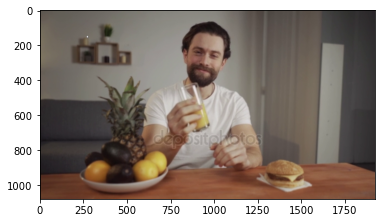

In [9]:
view_imgs_as_video(action_imgs)

In [10]:
fn, s,e=eating[1]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:6][:-1]
len(action_imgs)

20

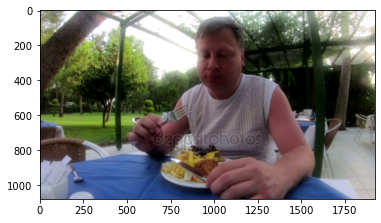

In [11]:
view_imgs_as_video(action_imgs)

In [12]:
fn, s,e=eating[2]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [13]:
fn, s,e=eating[3]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [14]:
fn, s,e=eating[4]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:3]
len(action_imgs)

20

In [15]:
fn, s,e=eating[5]
imgs=extract_imgs(fn)
action_imgs=imgs[s-1:e+1:4]
len(action_imgs)

20

In [16]:
fn, s,e=eating[6]
imgs=extract_imgs(fn)
action_imgs=imgs[s-1:e+1:4]
len(action_imgs)

20

In [17]:
fn, s,e=eating[7]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [18]:
fn, s,e=eating[8]
imgs=extract_imgs(fn)
action_imgs=imgs[s-1:e+1:4]
len(action_imgs)

20

In [19]:
fn, s,e=eating[9]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [20]:
fn, s,e=eating[10]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:6]
len(action_imgs)

20

In [23]:
fn, s,e=eating[11]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:3]
len(action_imgs)

20

In [26]:
fn, s,e=eating[12]
imgs=extract_imgs(fn)
action_imgs=imgs[s-1:e+1:4]
len(action_imgs)

20

In [29]:
fn, s,e=eating[13]
imgs=extract_imgs(fn)
action_imgs=imgs[s-1:e+1:4]
len(action_imgs)

20

In [31]:
fn, s,e=eating[14]
imgs=extract_imgs(fn)
action_imgs=imgs[s-1:e+1:4]
len(action_imgs)

20

In [35]:
fn, s,e=eating[15]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:4]
len(action_imgs)

20

In [36]:
fn, s,e=eating[16]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [38]:
fn, s,e=non_eating[0]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [44]:
fn, s,e=non_eating[1]
imgs=extract_imgs(fn)
action_imgs=imgs[s+2:e-3:6]
len(action_imgs)

20

In [45]:
fn, s,e=non_eating[2]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

20

In [54]:
fn, s,e=non_eating[3]
imgs=extract_imgs(fn)
action_imgs=imgs[s-7:e+7:4]
len(action_imgs)

20

In [61]:
fn, s,e=non_eating[4]
imgs=extract_imgs(fn)
action_imgs=imgs[s+5:e-5:12]
len(action_imgs)

20

In [ ]:
fn, s,e=non_eating[2]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

In [73]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)
def extract_keypoints(image_rgb): 
    try:
        results = pose.process(image_rgb)
        landmarks=results.pose_landmarks.landmark
    except Exception as e:
        # print('Error file=', fn)
        # print('Error=', e)
        return None
    xys=[]
    for landmark in landmarks:
        xys.append([landmark.x, landmark.y])
    xys=np.array(xys)
    return xys

### no time doing shortcut

In [93]:
actions=[]
for i, row in enumerate(eating):
    fn,s,e=row
    imgs=extract_imgs(fn)
    skip_frames=4
    if i==4 or i==11: skip_frames=3
    action_imgs= imgs[s:e:skip_frames]
    action=[]
    for img in action_imgs: 
        image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        xys=extract_keypoints(image_rgb)
        xys=xys[:25].ravel() #first 25 keypoints
        action.append(xys)

    if len(action)==19:
        action.append(action[-1])
    action=action[:20]
    action=np.array(action)
    actions.append(action)
    

    print(fn, len(action))

videos/eating1.mp4 20
videos/eating3.mp4 20
videos/eating4.mp4 20
videos/eating4.mp4 20
videos/eating4.mp4 20
videos/eating5.mp4 20
videos/eating5.mp4 20
videos/eating5.mp4 20
videos/eating7.mp4 20
videos/mango.mp4 20
videos/reading2.mp4 20
videos/similar1.mp4 20
videos/sitting.mp4 20
videos/eating8.mp4 20
videos/eating8.mp4 20
videos/eating8.mp4 20
videos/talking2.mp4 20


In [94]:
X_eating=np.array(actions)
X_eating.shape

(17, 20, 50)

In [95]:
actions_non=[]
for i, row in enumerate(non_eating):
    fn,s,e=row
    imgs=extract_imgs(fn)
    skip_frames=4
    if i==3: skip_frames=3
     
    action_imgs= imgs[s:e:skip_frames]
    action=[]
    for img in action_imgs: 
        image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        xys=extract_keypoints(image_rgb)
        if xys is None: 
            print('Error file=', fn)
            continue
        xys=xys[:25].ravel() #first 25 keypoints
        action.append(xys)
    
    
    action=action[:20]
    action=np.array(action)
    actions_non.append(action)

    print(fn, len(action))

videos/eating1.mp4 20
videos/eating3.mp4 20
videos/eating4.mp4 20
Error file= videos/eating5.mp4
videos/eating5.mp4 20
videos/eating6.mp4 20
videos/eating6.mp4 20
videos/eating7.mp4 20
videos/reading1.mp4 20
videos/reading1.mp4 20
videos/reading2.mp4 20
videos/similar3.mp4 20
videos/similar3.mp4 20
videos/sitting.mp4 20
videos/smartphone.mp4 20
videos/talking.mp4 20
videos/talking.mp4 20
videos/talking.mp4 20
videos/talking2.mp4 20


In [96]:
X_not_eating=np.array(actions_non)
X_not_eating.shape

(18, 20, 50)

In [97]:
X=np.concatenate((X_eating, X_not_eating))
X.shape

(35, 20, 50)

In [98]:
y=np.array([1]*X_eating.shape[0]+[0]*X_not_eating.shape[0])
y.shape

(35,)

In [103]:
X=torch.from_numpy(X).float()
y=torch.from_numpy(y).reshape(-1,1)
X.shape, y.shape

(torch.Size([35, 20, 50]), torch.Size([35, 1]))

In [104]:
ids=np.arange(X.shape[0])
np.random.shuffle(ids)
train_ids=ids[:int(len(ids)*0.8)]
test_ids=ids[int(len(ids)*0.8):]
X_train, y_train=X[train_ids], y[train_ids]
X_test, y_test=X[test_ids], y[test_ids]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([28, 20, 50]),
 torch.Size([28, 1]),
 torch.Size([7, 20, 50]),
 torch.Size([7, 1]))

In [107]:
class LSTM(nn.Module):
    
    def __init__(self,input_dim,hidden_dim,output_dim,layer_num, seq_len):
        super(LSTM,self).__init__()
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.lstm = torch.nn.LSTM(input_dim,hidden_dim,layer_num,batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim,output_dim)
        self.bn = nn.BatchNorm1d(seq_len)
        
    def forward(self,inputs):
        x = self.bn(inputs)
        lstm_out,(hn,cn) = self.lstm(x)
        out = self.fc(lstm_out[:,-1,:])
        return out

In [108]:
# def categoryFromOutput(output):
#     top_n, top_i = output.topk(1)
#     category_i = top_i[0].item()
#     return action_name[category_i], category_i

In [109]:
import random
n_data_size_train = X_train.shape[0]
n_data_size_test = X_test.shape[0]

def randomTrainingExampleBatch(batch_size,flag,num=-1):
    if flag == 'train':
        X = X_train
        y = y_train
        data_size = n_data_size_train
    elif flag == 'test':
        X = X_test
        y = y_test
        data_size = n_data_size_test
    if num == -1:
        ran_num = random.randint(0,data_size-batch_size)
    else:
        ran_num = num
    pose_sequence_tensor = X[ran_num:(ran_num+batch_size)]
    pose_sequence_tensor = pose_sequence_tensor
    category_tensor = y[ran_num:ran_num+batch_size,:]
    return category_tensor.long(),pose_sequence_tensor

In [110]:
n_hidden = 128
n_joints = 25*2
n_categories = 2
n_layer = 3
seq_len = 20
rnn = LSTM(n_joints,n_hidden,n_categories,n_layer, seq_len)
rnn.to(device)

LSTM(
  (lstm): LSTM(50, 128, num_layers=3, batch_first=True)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (bn): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [111]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.0005
optimizer = optim.SGD(rnn.parameters(),lr=learning_rate,momentum=0.9)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10000, gamma=0.1)

In [112]:
n_iters = 30000
print_every = 1000
plot_every = 1000
batch_size = 4

# Keep track of losses for plotting
current_loss = 0
all_losses = []

 
start = time.time()

for iter in range(1, n_iters + 1):
   
    category_tensor, input_sequence = randomTrainingExampleBatch(batch_size,'train')
    input_sequence = input_sequence.to(device)
    category_tensor = category_tensor.to(device)
    category_tensor = torch.squeeze(category_tensor)
    
    optimizer.zero_grad()
    
    output = rnn(input_sequence)
    loss = criterion(output, category_tensor)
    loss.backward()
    optimizer.step() 
 
    current_loss += loss.item()

    print('iter: %d, loss: %.3f' % (iter, loss.item()))
    
    
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

iter: 1, loss: 0.706
iter: 2, loss: 0.692
iter: 3, loss: 0.717
iter: 4, loss: 0.706
iter: 5, loss: 0.681
iter: 6, loss: 0.681
iter: 7, loss: 0.704
iter: 8, loss: 0.704
iter: 9, loss: 0.703
iter: 10, loss: 0.683
iter: 11, loss: 0.692
iter: 12, loss: 0.692
iter: 13, loss: 0.693
iter: 14, loss: 0.682
iter: 15, loss: 0.682
iter: 16, loss: 0.693
iter: 17, loss: 0.702
iter: 18, loss: 0.682
iter: 19, loss: 0.703
iter: 20, loss: 0.692
iter: 21, loss: 0.692
iter: 22, loss: 0.683
iter: 23, loss: 0.691
iter: 24, loss: 0.691
iter: 25, loss: 0.683
iter: 26, loss: 0.712
iter: 27, loss: 0.683
iter: 28, loss: 0.693
iter: 29, loss: 0.703
iter: 30, loss: 0.703
iter: 31, loss: 0.703
iter: 32, loss: 0.683
iter: 33, loss: 0.693
iter: 34, loss: 0.683
iter: 35, loss: 0.693
iter: 36, loss: 0.700
iter: 37, loss: 0.701
iter: 38, loss: 0.693
iter: 39, loss: 0.700
iter: 40, loss: 0.684
iter: 41, loss: 0.686
iter: 42, loss: 0.691
iter: 43, loss: 0.686
iter: 44, loss: 0.691
iter: 45, loss: 0.691
iter: 46, loss: 0.7

KeyboardInterrupt: 

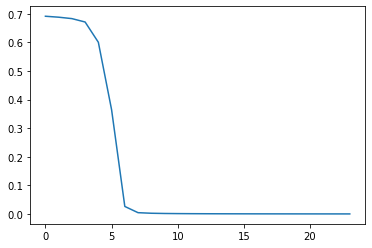

In [113]:
plt.plot(all_losses)

In [114]:
#test 

rnn.eval()

n_correct = 0
n_total = 0
for i in range(n_data_size_test):
    category_tensor, input_sequence = randomTrainingExampleBatch(1,'test',i)
    input_sequence = input_sequence.to(device)
    category_tensor = category_tensor.to(device)
    category_tensor = torch.squeeze(category_tensor)
    output = rnn(input_sequence)
    po=output.argmax(axis=1)
    guess=po.item()
    category = category_tensor
    if category == guess:
        n_correct += 1
    n_total += 1

print('Accuracy of %d test data: %.3f%%' % (n_data_size_test, n_correct / n_total * 100))

Accuracy of 7 test data: 71.429%


In [115]:
#test 
n_correct = 0
n_total = 0
for i in range(n_data_size_test):
    category_tensor, input_sequence = randomTrainingExampleBatch(1,'train',i)
    input_sequence = input_sequence.to(device)
    category_tensor = category_tensor.to(device)
    category_tensor = torch.squeeze(category_tensor)
    output = rnn(input_sequence)
    po=output.argmax(axis=1)
    guess=po.item()
    category = category_tensor
    if category == guess:
        n_correct += 1
    n_total += 1

print('Accuracy of %d test data: %.3f%%' % (n_data_size_test, n_correct / n_total * 100))

Accuracy of 7 test data: 100.000%


### load a video and predict

In [133]:
fn, s,e=eating[3]
fn, s,e=non_eating[5]
imgs=extract_imgs(fn)
action_imgs=imgs[s:e:5]
len(action_imgs)

50

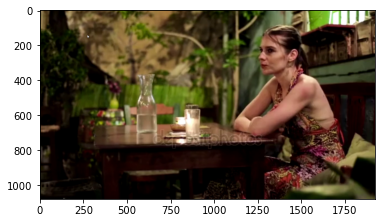

In [134]:
view_imgs_as_video(action_imgs)

In [135]:
action=[]
for img in action_imgs: 
    image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    xys=extract_keypoints(image_rgb)
    xys=xys[:25].ravel()
    action.append(xys)
action=np.array(action)[:20]
action.shape

(20, 50)

In [136]:
tx=torch.from_numpy(action).float()
tx=tx.unsqueeze(0).to(device)
tx.shape

torch.Size([1, 20, 50])

In [137]:
output = rnn(tx).cpu().detach().numpy()
po=output.argmax(axis=1)
prediction=po[0]
print('prediction=', prediction)

prediction= 0
